In [89]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [90]:
import os
import shutil
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [47]:
import keras 
import os
import glob 
import cv2
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import matplotlib.pyplot as plt

target_size = (224,224)

img_dir = 'C:\\Users\\DELL\\Downloads\\Citrus\\Fruits\\Canker'
data_path = os.path.join(img_dir,'*g') #global path of the img_dir.....
files = glob.glob(data_path) # all the files inside the data path is here...

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    shear_range= 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,
    fill_mode = 'nearest'
)

for f1 in files:
    img = load_img(f1,target_size = target_size)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    path,dir,files = next(os.walk(img_dir))
    file_counts = len(files)
    for batch in datagen.flow(x,batch_size= 1 , save_to_dir = r'C:\\SpCitrus\\Fruits\\Canker', save_prefix = 'a' , save_format='jpg'):
        i+=1
        if i == 10 : # from each image 10 image will be generated in a new file
            break    

In [91]:

dir_path = "C:\\Citrus\\Fruits"
# Define the classes

classes = ["Black Spot", "Canker", "Greening", "healthy", "Scab"]
# Define the training and testing directories

train_dir = "C:\\SpCitrus\\Fruits\\train_dir"
test_dir = "C:\\SpCitrus\\Fruits\\test_dir"
# Create the training and testing directories

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

for class_name in classes:
    class_dir = os.path.join(dir_path, class_name)
    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith(".jpg") or f.endswith(".png")]
    train_files, test_files = train_test_split(image_files, test_size=0.1, random_state=42)
    # Copy the training files to the training directory
    for file_path in train_files:
        file_name = os.path.basename(file_path)
        new_file_path = os.path.join(train_dir, class_name, file_name)
        if not os.path.exists(os.path.join(train_dir, class_name)):
            os.makedirs(os.path.join(train_dir, class_name))
        shutil.copy(file_path, new_file_path)
    # Copy the testing files to the testing directory
    for file_path in test_files:
        file_name = os.path.basename(file_path)
        new_file_path = os.path.join(test_dir, class_name, file_name)
        if not os.path.exists(os.path.join(test_dir, class_name)):
            os.makedirs(os.path.join(test_dir, class_name))
        shutil.copy(file_path, new_file_path)

In [92]:
from tensorflow import keras

In [105]:
train_data='C:\\Citrus\\Fruits\\train_dir'
test_data='C:\\Citrus\\Fruits\\test_dir'

In [106]:
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X_train, Y_train, labels = get_data(train_data)
X_test, Y_test,_ = get_data(test_data)

In [107]:
from keras.utils import to_categorical

In [108]:
Y_train = to_categorical(Y_train, 5)
Y_test = to_categorical(Y_test, 5)

In [109]:
X_test, X_val = train_test_split(X_test, test_size=0.4, random_state=42)
Y_test, Y_val = train_test_split(Y_test, test_size=0.4, random_state=42)

In [110]:
import keras 
import os
import glob 
import cv2
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import matplotlib.pyplot as plt

def convert_image_to_array(files, target_size):
    images_as_array = []
    for file in files:
        img = load_img(file, target_size=target_size)  # Load and resize the image
        img_array = img_to_array(img)
        images_as_array.append(img_array)
    return images_as_array

# Define the target size for resizing

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1174,)
(177,)
(118,)


In [111]:
target_size = (224, 224)

# Convert images to arrays
X_train = np.array(convert_image_to_array(X_train, target_size))
X_val = np.array(convert_image_to_array(X_val, target_size))
X_test = np.array(convert_image_to_array(X_test, target_size))


In [112]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [113]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense, Attention, Input

# Define the CNN model with attention
model = Sequential()

# Input shape is 100x100 since that's the dimension of each fruit image
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(224, 224, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

# Applying attention after the last convolutional layer
attention = Attention()([model.layers[-1].output, model.layers[-1].output])

# Fully connected layers
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))

# Creating the model with attention
model_with_attention = Model(inputs=model.input, outputs=model.output)

# Displaying the summary of the model
model_with_attention.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16_input (InputLaye  [(None, 224, 224, 3)]     0         
 r)                                                              
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 16)      208       
                                                                 
 activation_8 (Activation)   (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 56, 56, 32)        0   

In [114]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model_with_attention.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [115]:
history = model_with_attention.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        verbose=2, shuffle=True)

Epoch 1/20
10/10 - 23s - loss: 1.4766 - accuracy: 0.4463 - val_loss: 1.2657 - val_accuracy: 0.5254 - 23s/epoch - 2s/step
Epoch 2/20
10/10 - 13s - loss: 1.2292 - accuracy: 0.5119 - val_loss: 1.0928 - val_accuracy: 0.5254 - 13s/epoch - 1s/step
Epoch 3/20
10/10 - 13s - loss: 1.0635 - accuracy: 0.5733 - val_loss: 0.8787 - val_accuracy: 0.6102 - 13s/epoch - 1s/step
Epoch 4/20
10/10 - 12s - loss: 0.9513 - accuracy: 0.6278 - val_loss: 0.9120 - val_accuracy: 0.6102 - 12s/epoch - 1s/step
Epoch 5/20
10/10 - 13s - loss: 0.8969 - accuracy: 0.6346 - val_loss: 0.8081 - val_accuracy: 0.6780 - 13s/epoch - 1s/step
Epoch 6/20
10/10 - 13s - loss: 0.8250 - accuracy: 0.6635 - val_loss: 0.8619 - val_accuracy: 0.6356 - 13s/epoch - 1s/step
Epoch 7/20
10/10 - 13s - loss: 0.8196 - accuracy: 0.6678 - val_loss: 0.7935 - val_accuracy: 0.6864 - 13s/epoch - 1s/step
Epoch 8/20
10/10 - 12s - loss: 0.7699 - accuracy: 0.6968 - val_loss: 0.7236 - val_accuracy: 0.7119 - 12s/epoch - 1s/step
Epoch 9/20
10/10 - 12s - loss: 0

In [116]:
score = model_with_attention.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

6/6 [==============================] - 2s 81ms/step - loss: 0.4890 - accuracy: 0.8192
Test accuracy: 0.8192090392112732


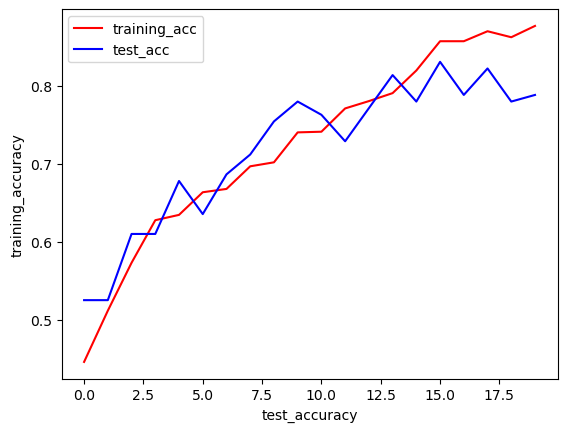

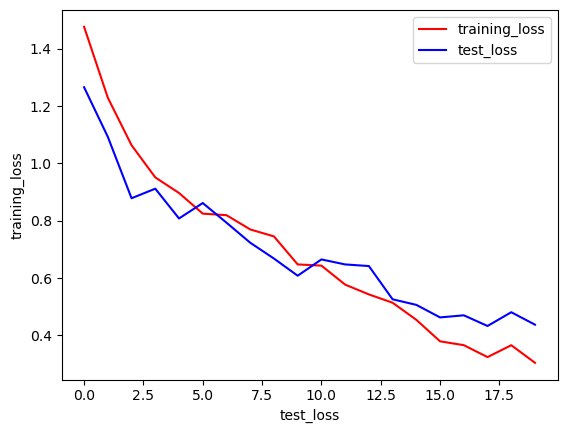

In [117]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'training_acc')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'test_acc')
plt.ylabel('training_accuracy')
plt.xlabel('test_accuracy')
plt.legend()
plt.show()




plt.plot(history.history['loss'],color = 'red',label = 'training_loss')
plt.plot(history.history['val_loss'],color = 'blue',label = 'test_loss')
plt.ylabel('training_loss')
plt.xlabel('test_loss')
plt.legend()
plt.show()


6/6 [==============================] - 9s 76ms/step


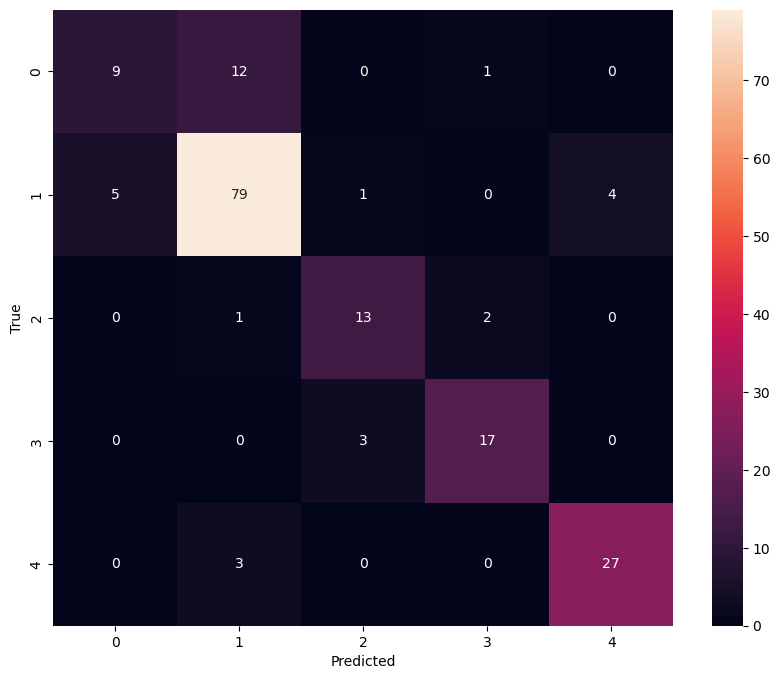

6/6 [==============================] - 2s 77ms/step - loss: 0.4890 - accuracy: 0.8192
Test accuracy is 0.8192090392112732 and test loss is 0.4889593720436096


In [118]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


y_pred = model_with_attention.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

confusion_mtx = confusion_matrix(np.argmax(Y_test, axis=1), y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

test_loss, test_acc = model_with_attention.evaluate(X_test, Y_test)
print(f"Test accuracy is {test_acc} and test loss is {test_loss}")


In [119]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on test set
Y_pred = model_with_attention.predict(X_test)
# Convert predictions to one-hot encoded labels
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_true_labels = np.argmax(Y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_true_labels, Y_pred_labels)

# Classification Report
class_report = classification_report(Y_true_labels, Y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


6/6 [==============================] - 3s 78ms/step
Confusion Matrix:
[[ 9 12  0  1  0]
 [ 5 79  1  0  4]
 [ 0  1 13  2  0]
 [ 0  0  3 17  0]
 [ 0  3  0  0 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.41      0.50        22
           1       0.83      0.89      0.86        89
           2       0.76      0.81      0.79        16
           3       0.85      0.85      0.85        20
           4       0.87      0.90      0.89        30

    accuracy                           0.82       177
   macro avg       0.79      0.77      0.78       177
weighted avg       0.81      0.82      0.81       177

